# Requisições de Aplicações QKD

Demonstração da geração e atendimento dos requests em uma rede de aplicações QKD.

In [9]:
# Componentes básicos da rede
from components import Network, Controller
# Funções auxiliares para executar as aplicações
from components.qkd.app import *

In [10]:
# Criando uma rede:
rede = Network()

# Definindo a topologia
rows = 3
cols = 4
rede.set_lattice_topology(rows, cols)

# Definindo um controlador
controlador = Controller(rede)

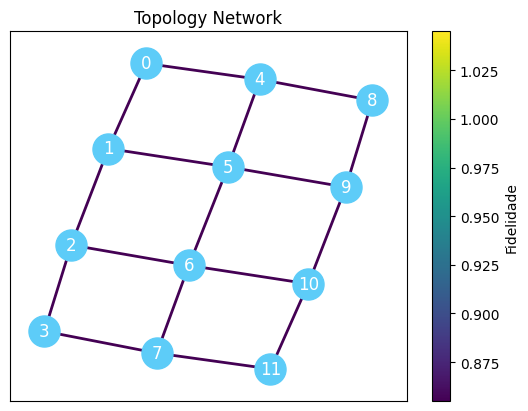

In [11]:
# Visualizando a topologia da rede
rede.draw()

In [12]:
# Critérios para requisições
num_request = 100
diff_nodes = 5
key_size = 10

In [13]:
# Criando uma função para gerar requisições aleatórias de qkd
def generate_qkd_requests(rede, num_requests, apps, case):
        """
        Gera uma lista de requisições aleatórias de QKD.

        Args:
            num_requests (int): Número de requisições.
            diff_nodes (int): Número entre os nós. Defauts to 5.
            apps (list): Lista de apps disponíveis.
            
        Returns:
            requests (list): Lista com requisições.
        """
        classes = ["Class A", "Class B", "Class C", "Class D", "Class E"]
        requests = []
        
        if case == 0:
            class_distribution = [1/5] * 5
        elif case == 1:
            class_distribution = [0.2] * 5
        elif case == 2:
            class_distribution = [0.1, 0.1, 0.3, 0.25, 0.25]
        elif case == 3:
            class_distribution = [0.25, 0.25, 0.2, 0.1, 0.1]
        elif case == 4:
            class_distribution = [0.3, 0.3, 0.1, 0.15, 0.15]
        else:
            raise ValueError("Invalid case parameter")
            
        for i in range(num_requests):
            classe = random.choices(classes, class_distribution)[0]
            app = random.choice(apps)
            priority = random.randint(1, 5)
            alice, bob = rede.random_alice_bob()
            r = Request(classe, app, priority, alice, bob)
            requests.append(r)
        return requests

In [14]:
# Gerando requisições aleatórias
apps = ["BB84", "E91", "B92"]
case = 0
num_request = 10
requests = generate_qkd_requests(rede, num_request, apps, case)
for r in requests:
    print(r.__str__())

E91: 2-5 (P:5 Key: 200)
BB84: 4-0 (P:1 Key: 400)
E91: 0-7 (P:1 Key: 300)
E91: 2-4 (P:5 Key: 100)
B92: 0-1 (P:5 Key: 100)
BB84: 2-8 (P:3 Key: 100)
B92: 2-5 (P:1 Key: 400)
B92: 10-11 (P:4 Key: 300)
B92: 5-11 (P:2 Key: 300)
E91: 4-2 (P:4 Key: 400)


In [15]:
# Realizanod as requisições
routes_calculation_type = "shortest"
results = controlador.send_requests(requests, routes_calculation_type)

1ª EXECUÇÃO:
Requisições:  ['E91: 2-5 (P:5 Key: 200)', 'BB84: 4-0 (P:1 Key: 400)', 'E91: 0-7 (P:1 Key: 300)', 'E91: 2-4 (P:5 Key: 100)', 'B92: 0-1 (P:5 Key: 100)', 'BB84: 2-8 (P:3 Key: 100)', 'B92: 2-5 (P:1 Key: 400)', 'B92: 10-11 (P:4 Key: 300)', 'B92: 5-11 (P:2 Key: 300)', 'E91: 4-2 (P:4 Key: 400)']
Requests ordenados por prioridade:  ['E91: 2-5 (P:5 Key: 200)', 'E91: 2-4 (P:5 Key: 100)', 'B92: 0-1 (P:5 Key: 100)', 'B92: 10-11 (P:4 Key: 300)', 'E91: 4-2 (P:4 Key: 400)', 'BB84: 2-8 (P:3 Key: 100)', 'B92: 5-11 (P:2 Key: 300)', 'BB84: 4-0 (P:1 Key: 400)', 'E91: 0-7 (P:1 Key: 300)', 'B92: 2-5 (P:1 Key: 400)']
Rotas: [[2, 1, 5]]
Rota atual trabalhada:  [2, 1, 5]
Rotas: [[2, 1, 0, 4]]
Rota atual trabalhada:  [2, 1, 0, 4]
Rotas: [[0, 1]]
Rota atual trabalhada:  [0, 1]
Rotas: [[10, 11]]
Rota atual trabalhada:  [10, 11]
Rotas: [[4, 0, 1, 2]]
Rota atual trabalhada:  [4, 0, 1, 2]
Rotas: [[2, 1, 0, 4, 8]]
Rota atual trabalhada:  [2, 1, 0, 4, 8]
Rotas: [[5, 6, 7, 11]]
Rota atual trabalhada:  [5, 

In [16]:
print("Número de execuções para atender todas as requests: ", len(results))

Número de execuções para atender todas as requests:  13
